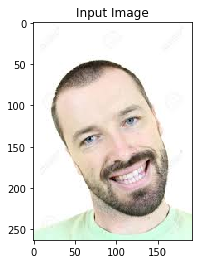

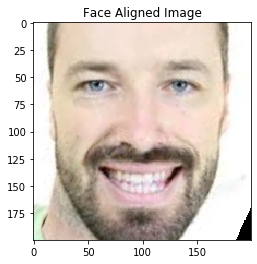

In [2]:
#importing the dependencies
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#creating the detector to detct face from input image
detector = dlib.get_frontal_face_detector()

#creaeting predcitor to predcit the 68 landmarks of input image
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

#reading-in image 
img_bgr = cv2.imread('tilted_image.jpg')

#as image in OpenCv is in BGR format while in matplotlib it is in RGB format for converting format from BGR 2 RGB
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#seeing the output
plt.imshow(img)
plt.title('Input Image')
plt.show()


#detcting the face from the input image as it is our region of interest
#second argument here is important 3 here shows how much the image is upsampled while passing through dlib's model
#greater is the number better is the image but more time it will take to compute output
dets = detector(img, 3)


#counting number of faces in image because if there are no faces then no need to go further
num_faces = len(dets)

#if number of faces == 0 no face found is the output message else we will go further for computation
if num_faces == 0:
    
    print("Sorry, there were no faces found in '{}'".format(face_file_path))

else:
        
    faces = dlib.full_object_detections()
    
    #predicting landmarks of detected face from input image
    for detection in dets:
        faces.append(predictor(img, detection))
        
    #aligning image to get better accuracy while comparing 2 images
    #We can play with padding to zoom-in and out to get required image
    images = dlib.get_face_chips(img, faces, size = 200, padding = 0.2)
    
    #converting image to numpy array
    images = np.array(images)
    
    #seeing the output of our model
    plt.imshow(images.reshape(200, 200, 3))
    
    #showing title of image
    plt.title('Face Aligned Image')
    plt.show()